In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [5]:
# Set image size and paths
img_size = 128  # Resize images to 128x128
train_dir = r"D:\old dataset\Testing"  # Path to your Training folder
test_dir = r"D:\old dataset\Training"  # Path to your Testing folder


print("Training Data Structure:")
for category in os.listdir(train_dir):
    category_path = os.path.join(train_dir, category)
    if os.path.isdir(category_path):
        print(f"- {category}: {len(os.listdir(category_path))} images")

print("\nTesting Data Structure:")
for category in os.listdir(test_dir):
    category_path = os.path.join(test_dir, category)
    if os.path.isdir(category_path):
        print(f"- {category}: {len(os.listdir(category_path))} images")


Training Data Structure:
- glioma_tumor: 100 images
- meningioma_tumor: 115 images
- no_tumor: 105 images
- pituitary_tumor: 74 images

Testing Data Structure:
- glioma_tumor: 826 images
- meningioma_tumor: 822 images
- no_tumor: 395 images
- pituitary_tumor: 827 images


In [1]:
import os
import cv2
import numpy as np

# Define dataset directories
train_dir = r"D:\old dataset\Testing"
test_dir = r"D:\old dataset\Training"
img_size = 128  # Example image size, adjust as needed

def load_images(data_dir, img_size):
    images = []
    labels = []
    label_map = {'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}
    
    for category in label_map:
        category_path = os.path.join(data_dir, category)
        if not os.path.exists(category_path):
            print(f"Warning: {category_path} does not exist!")
            continue
        
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)
            if img is None:
                print(f"Warning: Unable to read image {img_path}")
                continue
            
            img = cv2.resize(img, (img_size, img_size))
            images.append(img)
            labels.append(label_map[category])  # Assign numeric labels
            
    return np.array(images), np.array(labels)

# Load images and labels for both training and testing data
X_train, y_train = load_images(train_dir, img_size)
X_test, y_test = load_images(test_dir, img_size)

# Normalize pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0


In [3]:
from tensorflow.keras.utils import to_categorical

# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)


In [9]:
def build_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(4, activation='softmax')  # Multi-class classification (4 categories)
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [11]:
from tensorflow.keras import layers, models

def build_model():
    model = models.Sequential()
    model.add(layers.Input(shape=(64, 64, 3)))  # Define input shape as the first layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(4, activation='softmax'))  # Assuming 4 classes for classification
    return model


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

def build_model():
    model = Sequential()
    
    # Input layer
    model.add(Input(shape=(64, 64, 3)))  # Explicit input shape
    
    # First Conv Layer
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
    
    # Additional layers can go here...
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(4, activation='softmax'))  # Output layer for 4 classes (change accordingly)
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


In [5]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Input)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define dataset directories
train_dir = r"D:\old dataset\Testing"
test_dir = r"D:\old dataset\Training"
img_size = 128
batch_size = 32

# Define ImageDataGenerators for augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize images
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2  # Splitting data for validation
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Normalize test images

# Load data using ImageDataGenerator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Use only training data
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Use validation data
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Define CNN Model
model = Sequential([
    Input(shape=(img_size, img_size, 3)),  
    Conv2D(32, (3,3), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D(2,2),
    
    GlobalAveragePooling2D(),  # Better than Flatten for stability
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 output classes
])

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.0003)  # Slightly increased learning rate
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[early_stop, reduce_lr]
)

# Save the model in recommended format
model.save("brain_tumor_model.keras")  # Fixes the warning!


Found 316 images belonging to 4 classes.
Found 78 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 730ms/step - accuracy: 0.3176 - loss: 1.6495 - val_accuracy: 0.3718 - val_loss: 1.3769 - learning_rate: 3.0000e-04
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 601ms/step - accuracy: 0.4248 - loss: 1.3009 - val_accuracy: 0.2692 - val_loss: 1.3785 - learning_rate: 3.0000e-04
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 672ms/step - accuracy: 0.4591 - loss: 1.1815 - val_accuracy: 0.2692 - val_loss: 1.3918 - learning_rate: 3.0000e-04
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 680ms/step - accuracy: 0.4454 - loss: 1.1826 - val_accuracy: 0.2692 - val_loss: 1.4214 - learning_rate: 3.0000e-04
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 690ms/step - accuracy: 0.5150 - loss: 1.1334 - val_accuracy: 0.2692 - val_loss: 1.4551 - learning_rate: 6.0000e-05
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 708ms/step - accuracy: 0.4727 - loss: 1.1310 - val_accu

In [11]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Set image size and dataset paths
img_size = 128
train_dir = r"D:\old dataset\Testing"
test_dir = r"D:\old dataset\Training"
# Label Mapping
label_map = {'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

def load_images(data_dir, img_size):
    images, labels = [], []
    
    for category in label_map:
        category_path = os.path.join(data_dir, category)
        if not os.path.exists(category_path):
            print(f"Warning: {category_path} does not exist!")
            continue
        
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)
            if img is None:
                print(f"Warning: Unable to read image {img_path}")
                continue
            
            img = cv2.resize(img, (img_size, img_size))
            images.append(img)
            labels.append(label_map[category])  
    
    return np.array(images), np.array(labels)

# Load and preprocess data
X_train, y_train = load_images(train_dir, img_size)
X_test, y_test = load_images(test_dir, img_size)

# Normalize pixel values (0 to 1 range)
X_train, X_test = X_train / 255.0, X_test / 255.0

# Convert labels to one-hot encoding
y_train, y_test = to_categorical(y_train, num_classes=4), to_categorical(y_test, num_classes=4)

# Split train data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Data Augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20, width_shift_range=0.2, height_shift_range=0.2,
    shear_range=0.2, zoom_range=0.2, horizontal_flip=True
)
val_datagen = ImageDataGenerator()

# Model Architecture (Improved for High Accuracy)
def build_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(256, activation='relu'),  # Increased neurons
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(4, activation='softmax')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Build and compile model
model = build_model()

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# **Fixed model.fit() without workers issue**
history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=32),
    validation_data=val_datagen.flow(X_val, y_val, batch_size=32),
    epochs=50,
    callbacks=[early_stop]  # No 'workers' or 'use_multiprocessing'
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 335ms/step - accuracy: 0.2745 - loss: 1.3873 - val_accuracy: 0.3165 - val_loss: 1.3575
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 326ms/step - accuracy: 0.3422 - loss: 1.3873 - val_accuracy: 0.3165 - val_loss: 1.3538
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 492ms/step - accuracy: 0.2810 - loss: 1.3573 - val_accuracy: 0.3165 - val_loss: 1.3495
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 466ms/step - accuracy: 0.3061 - loss: 1.3703 - val_accuracy: 0.3418 - val_loss: 1.3445
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 593ms/step - accuracy: 0.2858 - loss: 1.3607 - val_accuracy: 0.3418 - val_loss: 1.3408
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 498ms/step - accuracy: 0.3079 - loss: 1.3660 - val_accuracy: 0.3038 - val_loss: 1.3317
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 463ms/step - accuracy: 0.3616 - loss: 1.3303 - val_accuracy: 0.3165 - val_loss: 1.3256
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 516ms/step - accuracy: 0.3195 - loss: 1.3386 - val_accuracy: 0.

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

def build_model(input_shape=(128, 128, 3)):
    model = Sequential([
        Input(shape=input_shape),  # Explicit Input layer
        Conv2D(32, (3, 3), activation='relu', padding="same"),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu', padding="same"),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu', padding="same"),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Conv2D(256, (3, 3), activation='relu', padding="same"),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(4, activation='softmax')  # 4 output classes
    ])
    return model

In [3]:
pip install --upgrade tensorflow keras


   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -------------------------------

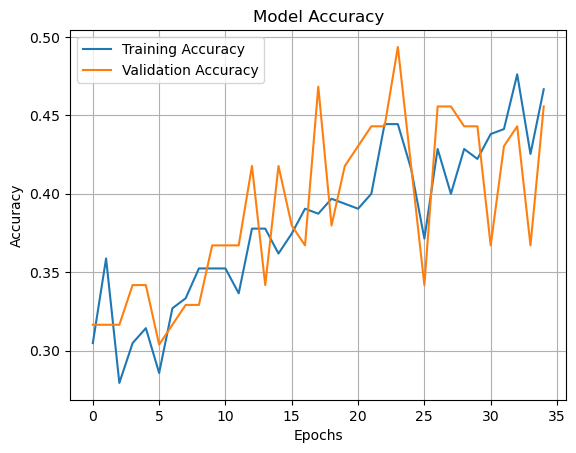

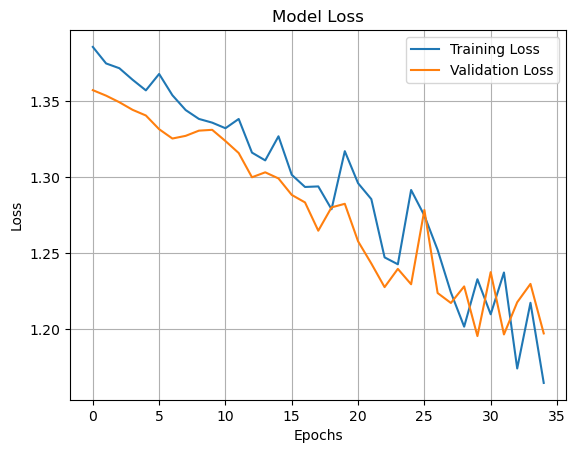

In [13]:
import matplotlib.pyplot as plt  # Importing matplotlib for plotting

# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)
plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step


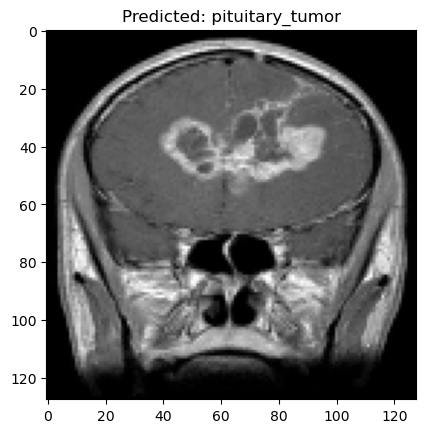

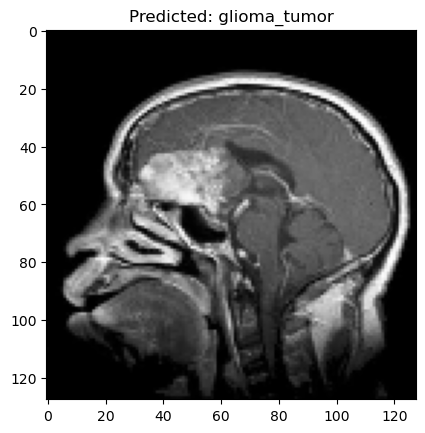

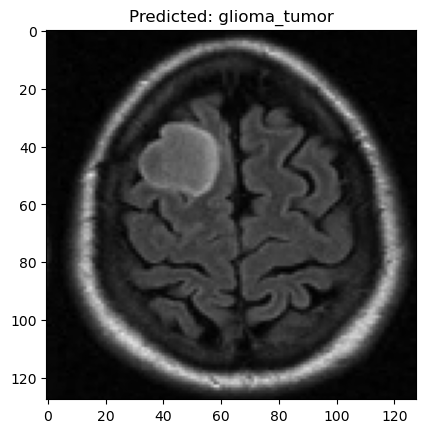

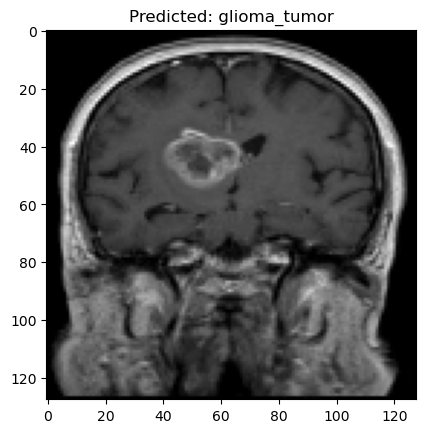

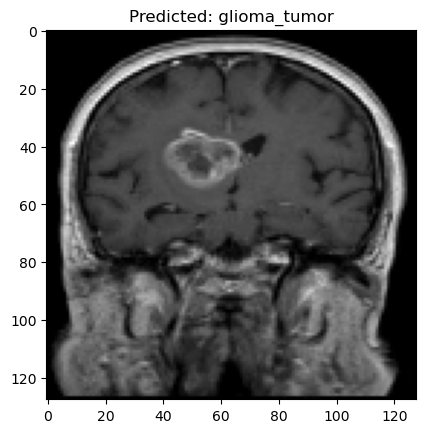

In [39]:
# Make predictions on test set
predictions = model.predict(X_test)

# Example to visualize some predictions
class_labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

for i in range(5):
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {class_labels[np.argmax(predictions[i])]}")  # Show the class with the highest probability
    plt.show()
